# Prepare Notes

In [1]:
# tabular data manipulation
import numpy as np
import pandas as pd
# datetime utilities
from datetime import timedelta, datetime
# visualization
import matplotlib.pyplot as plt

# no yelling in the library
import warnings
warnings.filterwarnings("ignore")

# our acquire script
import acquire

In [2]:
df= acquire.all_store_data()
df

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912995,50,63.0,"Wed, 27 Dec 2017 00:00:00 GMT",912996,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912996,50,59.0,"Thu, 28 Dec 2017 00:00:00 GMT",912997,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912997,50,74.0,"Fri, 29 Dec 2017 00:00:00 GMT",912998,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221
912998,50,62.0,"Sat, 30 Dec 2017 00:00:00 GMT",912999,10,8503 NW Military Hwy,San Antonio,10,TX,78231,Choice,50,Choice Organic Teas Black Tea Classic Black - ...,5.20,47445919221,47445919221


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_id       913000 non-null  int64  
 8   store_state    913000 non-null  object 
 9   store_zipcode  913000 non-null  int64  
 10  item_brand     913000 non-null  object 
 11  item_id        913000 non-null  int64  
 12  item_name      913000 non-null  object 
 13  item_price     913000 non-null  float64
 14  item_upc12     913000 non-null  int64  
 15  item_upc14     913000 non-null  int64  
dtypes: float64(2), int64(8), object(6)
memory usage: 118.4+ MB


In [4]:
df.shape

(913000, 16)

In [5]:
df.isnull().sum()

item             0
sale_amount      0
sale_date        0
sale_id          0
store            0
store_address    0
store_city       0
store_id         0
store_state      0
store_zipcode    0
item_brand       0
item_id          0
item_name        0
item_price       0
item_upc12       0
item_upc14       0
dtype: int64

In [6]:
df.sale_date = pd.to_datetime(df.sale_date).dt.date

In [7]:
#check dtypes
df.dtypes

item               int64
sale_amount      float64
sale_date         object
sale_id            int64
store              int64
store_address     object
store_city        object
store_id           int64
store_state       object
store_zipcode      int64
item_brand        object
item_id            int64
item_name         object
item_price       float64
item_upc12         int64
item_upc14         int64
dtype: object

In [8]:
#must complete step 2&3 (set date as index and sort)
df = df.set_index('sale_date').sort_index()

In [9]:
#make sure datatime is index now
type(df.index)

pandas.core.indexes.base.Index

In [10]:
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


In [11]:
df.shape[0], df.sale_id.nunique()

(913000, 913000)

<AxesSubplot:xlabel='sale_date'>

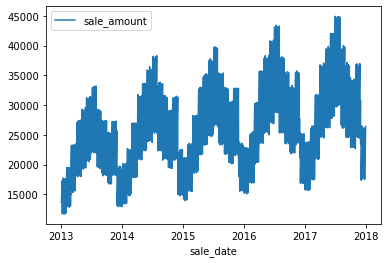

In [12]:
#this shows that there are distinct paterns in this data
#we have peaks and valleys depending on season
#market seems predictable
by_date = df.groupby(['sale_date']).sale_amount.sum().reset_index()
by_date.plot(x='sale_date', y='sale_amount')

In [13]:
#univariate info with even distribution 

In [14]:
# Number of observations per store = number of item-transactions per store.
df.store.value_counts()

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64

In [15]:
#number of items
df.item_id.value_counts().sort_index()

1     18260
2     18260
3     18260
4     18260
5     18260
6     18260
7     18260
8     18260
9     18260
10    18260
11    18260
12    18260
13    18260
14    18260
15    18260
16    18260
17    18260
18    18260
19    18260
20    18260
21    18260
22    18260
23    18260
24    18260
25    18260
26    18260
27    18260
28    18260
29    18260
30    18260
31    18260
32    18260
33    18260
34    18260
35    18260
36    18260
37    18260
38    18260
39    18260
40    18260
41    18260
42    18260
43    18260
44    18260
45    18260
46    18260
47    18260
48    18260
49    18260
50    18260
Name: item_id, dtype: int64

### Takeaways:
This all shows that there is an even distribution of items and stores within the dataframe
- 50 unique items
- 18260 sales per item
- 10 unique stores

<hr style="border:2px solid black"> </hr>

In [16]:
#find out what happens on first day of sales
#remove the index of datetime so we can use it in groupby (only for this problem)
first_sale = df.reset_index().groupby(['store', 'item_id']).sale_date.min()
first_sale.head()

store  item_id
1      1          2013-01-01
       2          2013-01-01
       3          2013-01-01
       4          2013-01-01
       5          2013-01-01
Name: sale_date, dtype: object

In [17]:
# get the unique dates from first_sale_per_storeitem
first_sale.unique() # if there's only one unique value, then YES!

#shows that every item was sold in everystore on the that date

array([datetime.date(2013, 1, 1)], dtype=object)

In [18]:
#look at last sale
last_sale = df.reset_index().groupby(['store', 'item_id']).sale_date.max()
last_sale.head()

store  item_id
1      1          2017-12-31
       2          2017-12-31
       3          2017-12-31
       4          2017-12-31
       5          2017-12-31
Name: sale_date, dtype: object

In [19]:
last_sale.unique() # if there's only one unique value, then YES!

array([datetime.date(2017, 12, 31)], dtype=object)

In [20]:
#see all the DIFFERENT days that items were sold at each store
days_per_store_per_item =  df.reset_index().groupby(['store', 'item_id']).sale_date.nunique()
days_per_store_per_item.head()

#there are no unique days.
#every item was sold every day at every store

store  item_id
1      1          1826
       2          1826
       3          1826
       4          1826
       5          1826
Name: sale_date, dtype: int64

<hr style="border:2px solid black"> </hr>

In [21]:
#you can see that sale_date is still index within the original df
df.head()

,item,sale_amount,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01,12,26.0,211817,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,46,27.0,832657,7,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664
2013-01-01,12,54.0,213643,8,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211
2013-01-01,12,35.0,215469,9,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### Check for time gaps in the data

In [22]:
#this shows that there are no missing days or values
#don't need to fill or pad this data
print('Number of rows:', df.index.nunique())
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

Number of rows: 1826
Number of days between first and last day: 1826 days 00:00:00


### Reproducability

In [23]:
def prep_store_data(df):
    return df.asign(sale_date=pd.to_datetime(df.sale_date)).sort_values('sale_date').set_index('sale_date')

<hr style="border:2px solid black"> </hr>

## Data Splitting
- **sklearn.model_selection.TimeSeriesSplit**

- Splitting time series data into train, test, and validate sets is a little trickier than with previous data we have looked at. Because the data points have an order to them, we cannot simply assign each point randomly to train, validate, or test.
- Ideally all splits should contain one season's worth of data. There are several methods we can use to split our time series data:
    - Human-based: use, for example, the last year in the dataset as test split
    - Percentage based: use the last 20% as test
    - Cross Validate: break data up into slices and use successive slices as train and test repeatedly (sklearn.model_selection.TimeSeriesSplit)

#### Important:
- We have to cut at a specific point in time
- cannot just scramble data up like before
- make the cut based on a cutoff on train that accurately sees seasonality
- overfitting can happen but to avoid it we must draw lines within validate and split it into subsets (**crossvalidation**)
    - K-fold cross validation